In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# %matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
# warnings.simplefilter(action='ignore')
# plt.style.use('seaborn')

In [4]:
#load dataset
df = pd.read_csv('Datasets\\car data.csv')

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
df.describe

<bound method NDFrame.describe of                       Car_Name  Year  Selling_Price  Present_Price  \
0                         ritz  2014           3.35          5.590   
1                          sx4  2013           4.75          9.540   
2                         ciaz  2017           7.25          9.850   
3                      wagon r  2011           2.85          4.150   
4                        swift  2014           4.60          6.870   
5                vitara brezza  2018           9.25          9.830   
6                         ciaz  2015           6.75          8.120   
7                      s cross  2015           6.50          8.610   
8                         ciaz  2016           8.75          8.890   
9                         ciaz  2015           7.45          8.920   
10                    alto 800  2017           2.85          3.600   
11                        ciaz  2015           6.85         10.380   
12                        ciaz  2015           7.50     

In [8]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
df['Age'] = 2023-df['Year']
df.drop('Year',axis=1,inplace=True)

In [10]:
df.describe

<bound method NDFrame.describe of                       Car_Name  Selling_Price  Present_Price  Kms_Driven  \
0                         ritz           3.35          5.590       27000   
1                          sx4           4.75          9.540       43000   
2                         ciaz           7.25          9.850        6900   
3                      wagon r           2.85          4.150        5200   
4                        swift           4.60          6.870       42450   
5                vitara brezza           9.25          9.830        2071   
6                         ciaz           6.75          8.120       18796   
7                      s cross           6.50          8.610       33429   
8                         ciaz           8.75          8.890       20273   
9                         ciaz           7.45          8.920       42367   
10                    alto 800           2.85          3.600        2135   
11                        ciaz           6.85         

In [11]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

### Exploratory Data Analysis (EDA) 

##### Univariate Analysis

In [12]:
df.columns
print(df.max())
df.min()

Car_Name                    xcent
Selling_Price(lacs)          35.0
Present_Price(lacs)          92.6
Kms_Driven                 500000
Fuel_Type                  Petrol
Seller_Type            Individual
Transmission               Manual
Past_Owners                     3
Age                            20
dtype: object


Car_Name                     800
Selling_Price(lacs)          0.1
Present_Price(lacs)         0.32
Kms_Driven                   500
Fuel_Type                    CNG
Seller_Type               Dealer
Transmission           Automatic
Past_Owners                    0
Age                            5
dtype: object

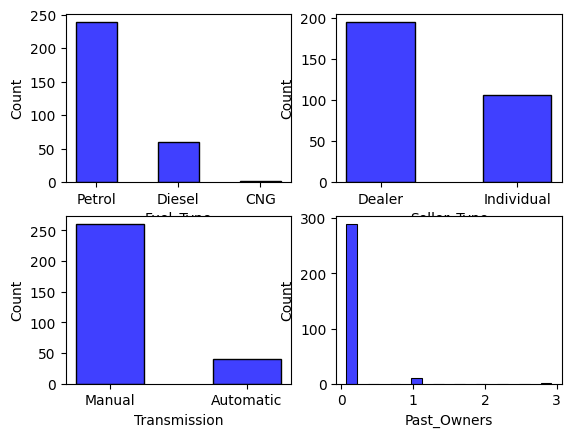

In [13]:
#plotting count-histograms for non-numeric individual features.
plt.subplot(2,2,1)
sns.histplot(df['Fuel_Type'],shrink=0.50,stat='count',color='blue')
plt.subplot(2,2,2)
sns.histplot(df['Seller_Type'],shrink=0.50,stat='count',color='blue')
plt.subplot(2,2,3)
sns.histplot(df['Transmission'],shrink=0.50,stat='count',color='blue')
plt.subplot(2,2,4)
sns.histplot(df['Past_Owners'],shrink=0.50,stat='count',color='blue')
plt.show()

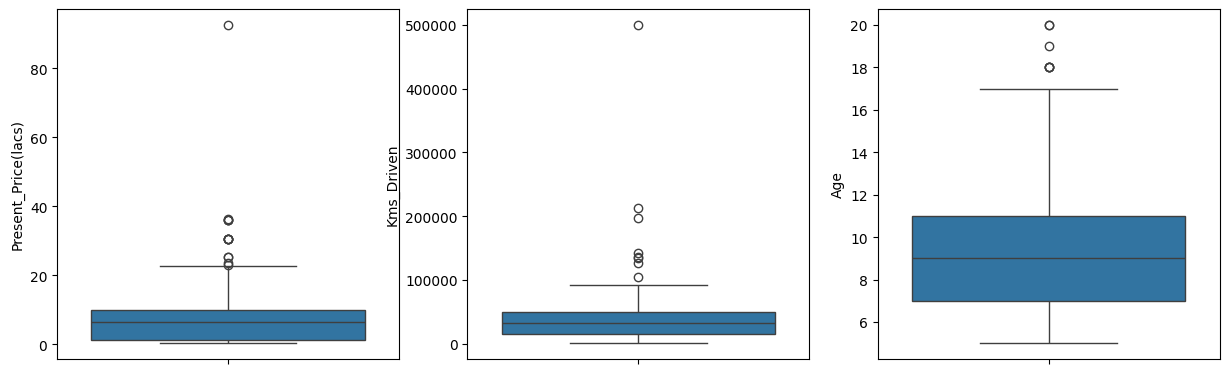

In [14]:
#plotting boxplots for numeric individual features for checking outliers.
x = plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(df['Present_Price(lacs)'])
plt.subplot(2,3,2)
sns.boxplot(df['Kms_Driven'])
plt.subplot(2,3,3)
sns.boxplot(df['Age'])
plt.show()

### Preprocessing 

In [15]:
#processing or removing the outliers mathematically
#by using the IQR(inter-quantile range) method.
out_features = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven']
for v in out_features:
    q1 = df[v].quantile(0.75)
    q2 = df[v].quantile(0.25)
    iqr = q1-q2
    up_bound = q1 + 1.5*iqr
    lo_bound = q2 - 1.5*iqr
    for i in df[v]:
        if i<lo_bound or i>up_bound:
            df.loc[df[v]==i,v] = df[v].median()

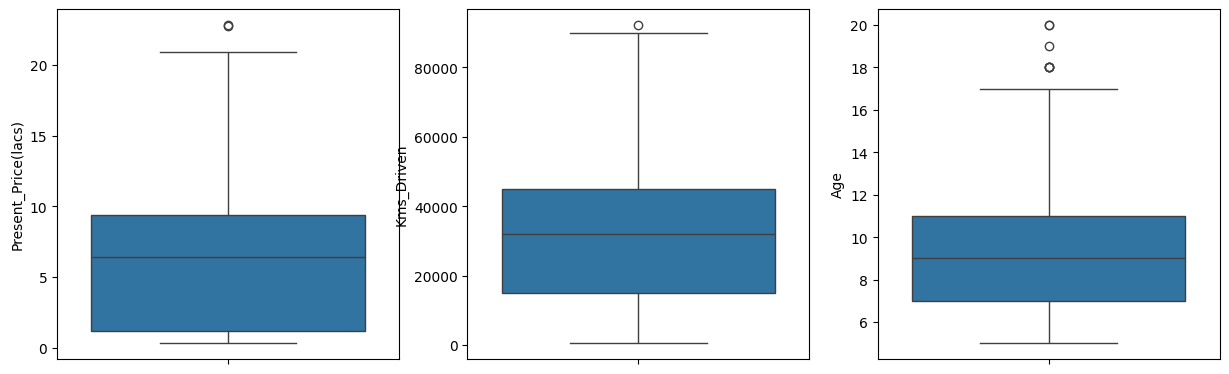

In [16]:
#visualizing the features after removing the outliers
x = plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(df['Present_Price(lacs)'])
plt.subplot(2,3,2)
sns.boxplot(df['Kms_Driven'])
plt.subplot(2,3,3)
sns.boxplot(df['Age'])
plt.show()

#### Bivariate/Multivariate Analysis

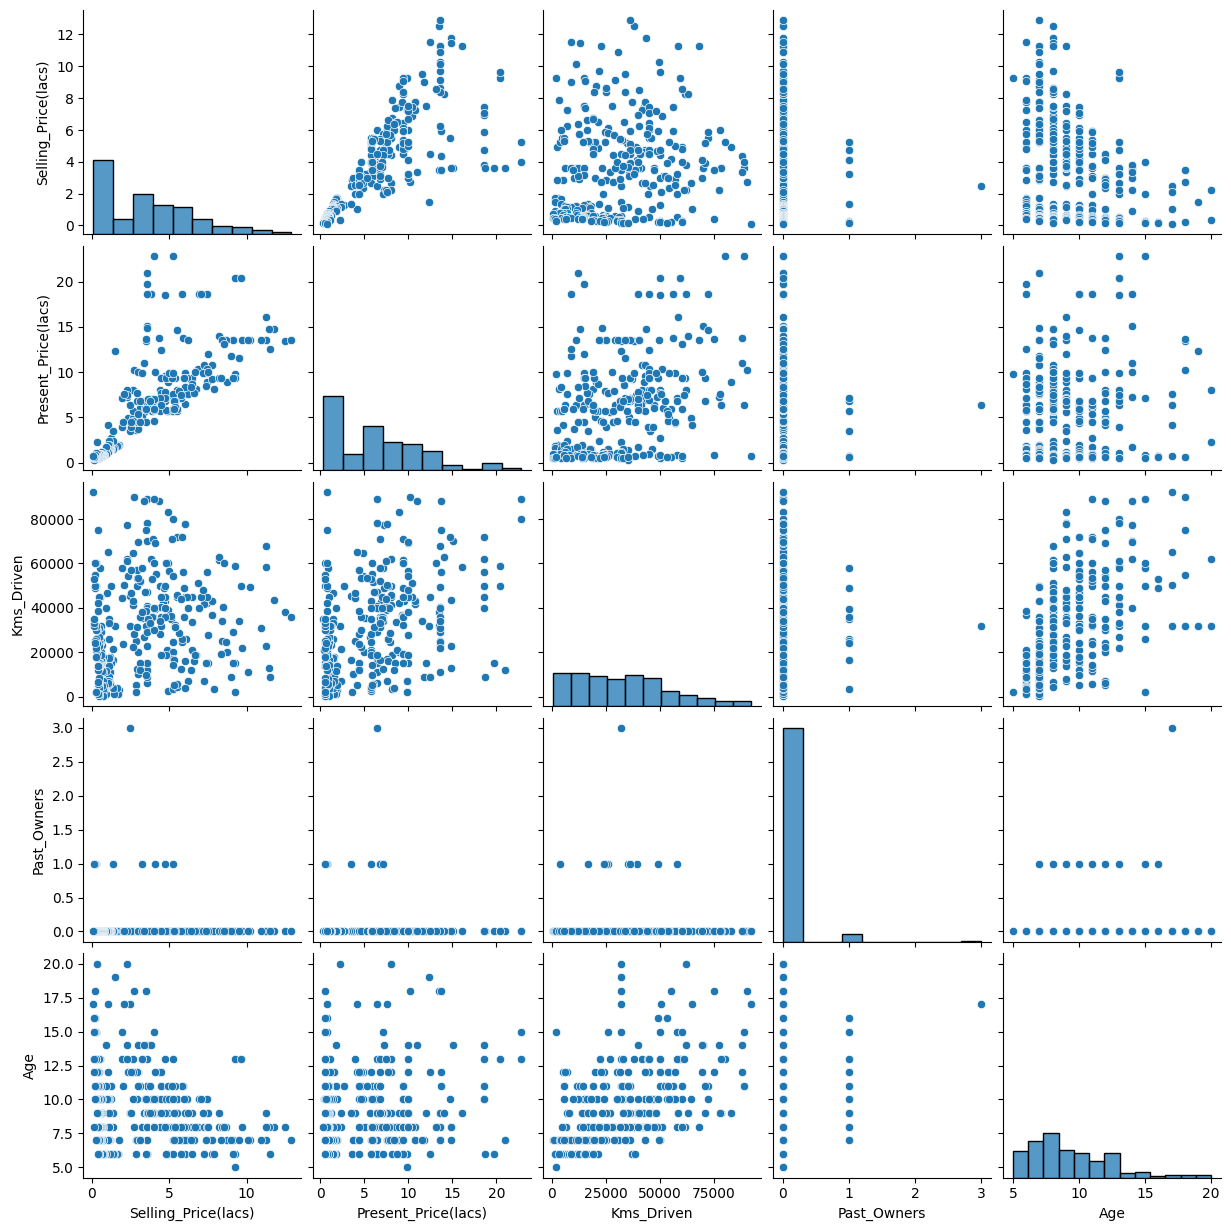

In [17]:
sns.pairplot(df)

In [23]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.show()

ValueError: could not convert string to float: 'ritz'

### Data Preparation

In [24]:
df.drop(labels = 'Car_Name',axis=1,inplace=True)

In [25]:
df.head

<bound method NDFrame.head of      Selling_Price(lacs)  Present_Price(lacs)  Kms_Driven Fuel_Type  \
0                   3.35                5.590       27000    Petrol   
1                   4.75                9.540       43000    Diesel   
2                   7.25                9.850        6900    Petrol   
3                   2.85                4.150        5200    Petrol   
4                   4.60                6.870       42450    Diesel   
5                   9.25                9.830        2071    Diesel   
6                   6.75                8.120       18796    Petrol   
7                   6.50                8.610       33429    Diesel   
8                   8.75                8.890       20273    Diesel   
9                   7.45                8.920       42367    Diesel   
10                  2.85                3.600        2135    Petrol   
11                  6.85               10.380       51000    Diesel   
12                  7.50                9.940  

In [26]:
df = pd.get_dummies(data=df,drop_first = True)

In [27]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


### Train-Test Split


In [28]:
#separating dependent and independent variables
y = df['Selling_Price(lacs)']
x = df.drop('Selling_Price(lacs)',axis=1)
#print(x)
#print(y)

In [29]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2,random_state=1)

In [30]:
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)


(240, 8)
(61, 8)
(240,)
(61,)


### Model Evaluation 

In [31]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
CV = []
R2_train = []
R2_test = []

def car_pred(model):
    # Training model
    model.fit(x_tr,y_tr)
            
    # R2 score of train set
    y_pred_tr = model.predict(x_tr)
    R2_train_model = r2_score(y_tr,y_pred_tr)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_te = model.predict(x_te)
    R2_test_model = r2_score(y_te,y_pred_te)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,x_tr ,y_tr ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_tr-y_pred_tr),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_te, y = y_pred_te)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()
    
    

### Applying Various Regression models

##### 1. Linear Regression model

Train R2-score : 0.76
Test R2-score : 0.81
Train CV scores : [0.77750826 0.72492737 0.67511227 0.7093812  0.7916414 ]
Train CV mean : 0.74


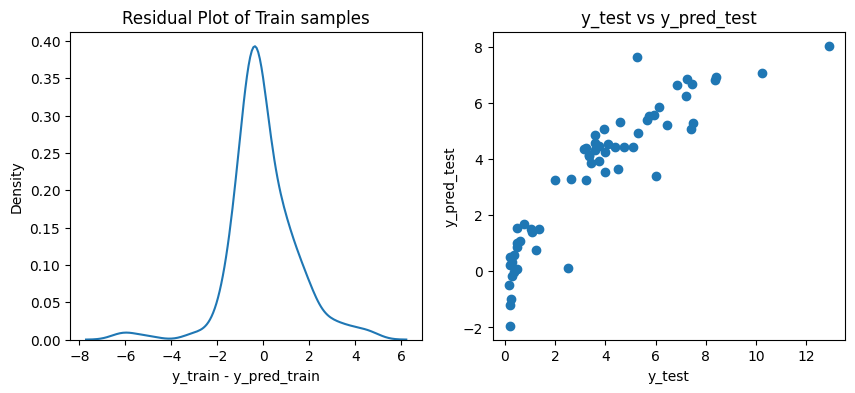

In [32]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
car_pred(slr)

##### 2. Lasso Regression model

Train R2-score : 0.76
Test R2-score : 0.8
Train CV scores : [0.77848249 0.7250195  0.6757782  0.69651636 0.79277535]
Train CV mean : 0.73


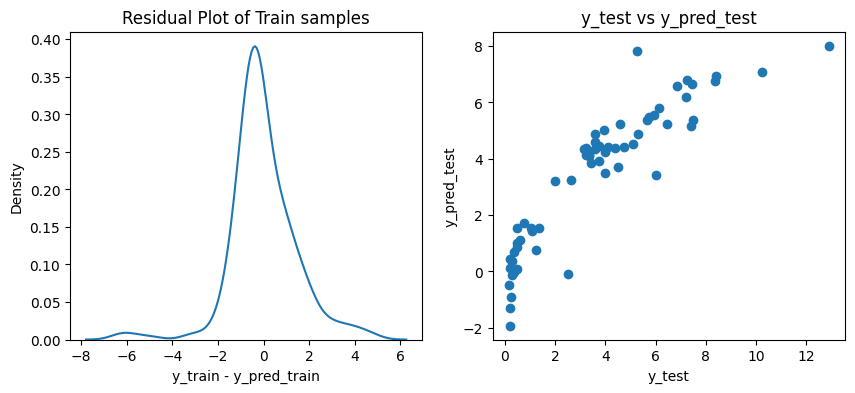

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred(ls_rs)

##### 3. Ridge Regression model 

Train R2-score : 0.76
Test R2-score : 0.81
Train CV scores : [0.77813216 0.72581131 0.66946188 0.70657079 0.7950857 ]
Train CV mean : 0.74


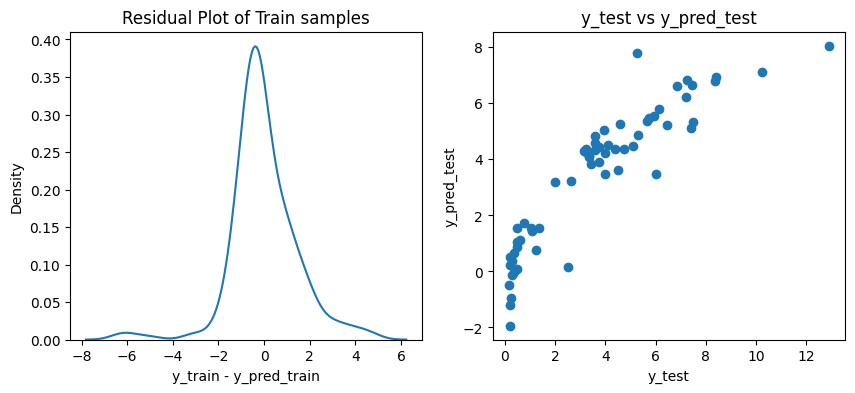

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred(rg_rs)

##### 4. Random Forest Regressor model

Train R2-score : 0.92
Test R2-score : 0.9
Train CV scores : [0.80876446 0.73157894 0.85658888 0.83039081 0.90832614]
Train CV mean : 0.83


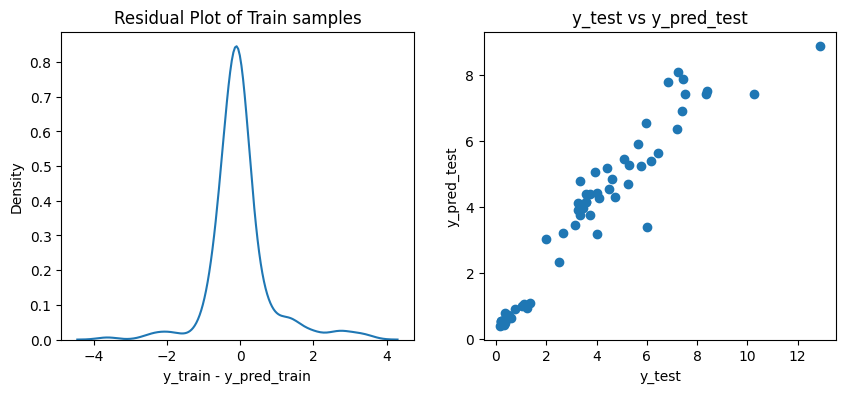

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
car_pred(rf_rs)

##### 5. Gradient Boosting Regressor model

Train R2-score : 1.0
Test R2-score : 0.94
Train CV scores : [0.82621107 0.84324053 0.83511976 0.63971411 0.94095621]
Train CV mean : 0.82


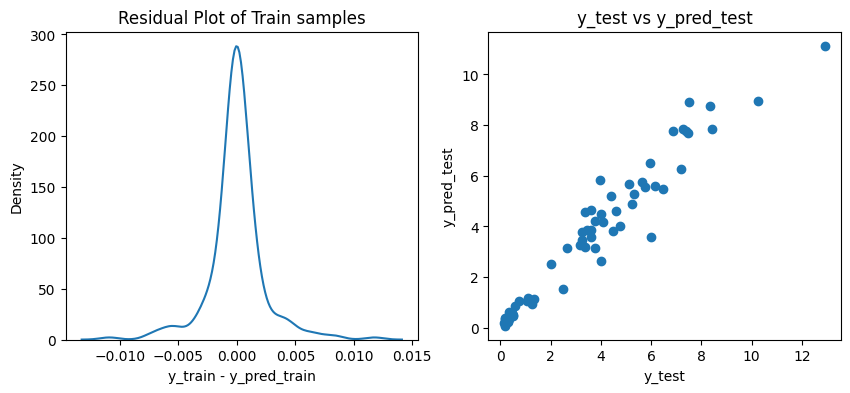

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_pred(gb_rs)

In [37]:
#Displaying results for each model applied 
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.76,0.81,0.74
1,Ridge,0.76,0.80,0.73
2,Lasso,0.76,0.81,0.74
3,RandomForestRegressor,0.92,0.90,0.83
4,GradientBoostingRegressor,1.00,0.94,0.82


### Storing the model in a Pickle file

In [38]:
import pickle
pickle.dump(rf_rs,open('rf_carmodel.pkl','wb'))
print("dumped")

dumped
